In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
df  = pd.read_csv("data.csv")
df.drop(["id", "Unnamed: 32"], axis=1, inplace=True)
df["diagnosis"] = df["diagnosis"].map({"M":1,"B":0})
print(df.isnull().sum())
print(df.head())


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1      

In [50]:
selected_features = [
    "radius_mean",
    "texture_mean",
    "perimeter_mean",
    "area_mean",
    "concavity_mean",
    "concave points_mean"
]

x = df[selected_features].values
y = df["diagnosis"].values.reshape(-1,1)

x = (x-np.mean(x,axis=0))/np.std(x,axis=0)

print("Null values per column:\n", df.isnull().sum())

Null values per column:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [51]:
def sigmoid(z):
  return 1/(1+np.exp(-z))


In [52]:
m, n = x.shape
weights = np.zeros((n, 1)) # shape(3,1)
bias = 0
lr = 0.01
epochs = 1000

for epoch in range(epochs):
  z = np.dot(x, weights) + bias
  pred = sigmoid(z)
  cost = -(1/m)*np.sum(y*np.log(pred+1e-9)+(1-y)*np.log(1-pred+1e-9))
  dw = (1/m)*np.dot(x.T, (pred-y))
  db = (1/m)*np.sum(pred-y)
  weights -= lr*dw
  bias -= lr*db
  if epoch%100==0:
    print(f"Epoch: {epoch}, Cost: {cost:.4f}")


Epoch: 0, Cost: 0.6931
Epoch: 100, Cost: 0.3868
Epoch: 200, Cost: 0.3013
Epoch: 300, Cost: 0.2609
Epoch: 400, Cost: 0.2372
Epoch: 500, Cost: 0.2216
Epoch: 600, Cost: 0.2106
Epoch: 700, Cost: 0.2023
Epoch: 800, Cost: 0.1959
Epoch: 900, Cost: 0.1908


In [53]:
def predict(x, weights, bias, threshold=0.5):
  z = np.dot(x,weights) + bias
  probs = sigmoid(z)
  return (probs > threshold).astype(int)



In [54]:
y_pred = predict(x,weights,bias)
accuracy = np.mean(y_pred==y)*100
print(f"\n final Accuracy: {accuracy:.2f}% ✅")
print("Final Weights:\n", weights)
print("Final Bias:\n", bias)



 final Accuracy: 92.97% ✅
Final Weights:
 [[0.6441205 ]
 [0.52956995]
 [0.66157153]
 [0.624287  ]
 [0.72341397]
 [0.85151788]]
Final Bias:
 -0.4057734594722842


In [55]:
print("\n--- Tumor Symptom Input Assistant ---")
print("We'll ask you to enter 6 tumor properties for prediction.\n")

print("🔵 radius_mean:")
print("Average size of the tumor cell nucleus.")
print("🔹 Small: 8–10, Medium: 12–15, Large: 18+ (suspicious)\n")
radius = float(input("Enter radius_mean: "))

print("\n🟣 texture_mean:")
print("Variation in shading across tumor cells.")
print("🔹 Low: 10–12, Medium: 15–20, High: 20+ (riskier)\n")
texture = float(input("Enter texture_mean: "))

print("\n🔶 perimeter_mean:")
print("Size of the tumor cell boundary (in pixels).")
print("🔹 Short: 50–70, Medium: 80–100, Long: 110+ (possibly malignant)\n")
perimeter = float(input("Enter perimeter_mean: "))

print("\n🟩 area_mean:")
print("Total area covered by tumor cells.")
print("🔹 Small: 400–600, Medium: 700–900, Large: 1000+ (often malignant)\n")
area = float(input("Enter area_mean: "))

print("\n🟠 concavity_mean:")
print("Measures how deeply the tumor cell edges curve inward.")
print("🔹 Low: <0.05, Medium: 0.05–0.15, High: >0.15\n")
concavity = float(input("Enter concavity_mean: "))

print("\n🟡 concave points_mean:")
print("Points where the cell edge curves inward (like dimples).")
print("🔹 Low: <0.03, Medium: 0.03–0.08, High: >0.08\n")
concave_points = float(input("Enter concave points_mean: "))


means = df[[
    "radius_mean", "texture_mean", "perimeter_mean",
    "area_mean", "concavity_mean", "concave points_mean"
]].mean()

stds = df[[
    "radius_mean", "texture_mean", "perimeter_mean",
    "area_mean", "concavity_mean", "concave points_mean"
]].std()

input_features = np.array([
    radius, texture, perimeter, area, concavity, concave_points
])
input_scaled = (input_features - means.values) / stds.values
x_input = input_scaled.reshape(1, -1)


prediction = predict(x_input, weights, bias)

if prediction[0][0] == 1:
    print("\n🧬 Prediction: Malignant (Cancerous) 🚨")
else:
    print("\n🧬 Prediction: Benign (Non-Cancerous) ✅")


--- Tumor Symptom Input Assistant ---
We'll ask you to enter 6 tumor properties for prediction.

🔵 radius_mean:
Average size of the tumor cell nucleus.
🔹 Small: 8–10, Medium: 12–15, Large: 18+ (suspicious)

Enter radius_mean: 19

🟣 texture_mean:
Variation in shading across tumor cells.
🔹 Low: 10–12, Medium: 15–20, High: 20+ (riskier)

Enter texture_mean: 15

🔶 perimeter_mean:
Size of the tumor cell boundary (in pixels).
🔹 Short: 50–70, Medium: 80–100, Long: 110+ (possibly malignant)

Enter perimeter_mean: 80

🟩 area_mean:
Total area covered by tumor cells.
🔹 Small: 400–600, Medium: 700–900, Large: 1000+ (often malignant)

Enter area_mean: 420

🟠 concavity_mean:
Measures how deeply the tumor cell edges curve inward.
🔹 Low: <0.05, Medium: 0.05–0.15, High: >0.15

Enter concavity_mean: 0.04

🟡 concave points_mean:
Points where the cell edge curves inward (like dimples).
🔹 Low: <0.03, Medium: 0.03–0.08, High: >0.08

Enter concave points_mean: 0.03

🧬 Prediction: Benign (Non-Cancerous) ✅


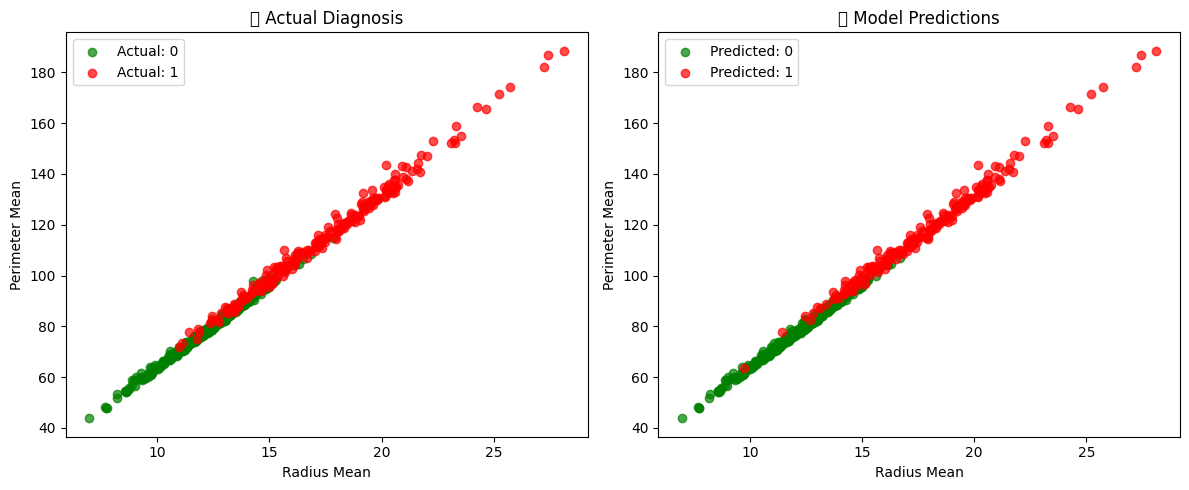

In [57]:

df["actual"] = y.flatten()
df["prediction"] = predict(x, weights, bias).flatten()

color_map = {0: 'green', 1: 'red'}

# Actual Labels Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for label in [0, 1]:
    subset = df[df["actual"] == label]
    plt.scatter(
        subset["radius_mean"],
        subset["perimeter_mean"],
        c=color_map[label],
        label=f"Actual: {label}",
        alpha=0.7
    )
plt.title("📌 Actual Diagnosis")
plt.xlabel("Radius Mean")
plt.ylabel("Perimeter Mean")
plt.legend()

# Predicted Labels Plot
plt.subplot(1, 2, 2)
for label in [0, 1]:
    subset = df[df["prediction"] == label]
    plt.scatter(
        subset["radius_mean"],
        subset["perimeter_mean"],
        c=color_map[label],
        label=f"Predicted: {label}",
        alpha=0.7
    )
plt.title("🤖 Model Predictions")
plt.xlabel("Radius Mean")
plt.ylabel("Perimeter Mean")
plt.legend()

plt.tight_layout()
plt.show()
